In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweet_train = pd.read_csv("C:/Users/legion/Machine Learning/training_twitter_x_y_train.csv")
tweet_test = pd.read_csv("C:/Users/legion/Machine Learning/test_twitter_x_test.csv")

In [3]:
tweet_train.head(3)

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)


In [4]:
tweet_train.count()

tweet_id                  10980
airline_sentiment         10980
airline                   10980
airline_sentiment_gold       31
name                      10980
negativereason_gold          24
retweet_count             10980
text                      10980
tweet_coord                 776
tweet_created             10980
tweet_location             7430
user_timezone              7403
dtype: int64

In [5]:
# Dropping Useless Columns

tweet_train.drop('tweet_id', inplace = True, axis = 1)
tweet_train.drop('airline_sentiment_gold', inplace = True, axis = 1)
tweet_train.drop('negativereason_gold', inplace = True, axis = 1)
tweet_train.drop('tweet_coord', inplace = True, axis = 1)
tweet_train.drop('tweet_created',inplace = True, axis = 1)

In [6]:
tweet_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  10980 non-null  object
 1   airline            10980 non-null  object
 2   name               10980 non-null  object
 3   retweet_count      10980 non-null  int64 
 4   text               10980 non-null  object
 5   tweet_location     7430 non-null   object
 6   user_timezone      7403 non-null   object
dtypes: int64(1), object(6)
memory usage: 600.6+ KB


In [7]:
tweet_train.head(3)

,airline_sentiment,airline,name,retweet_count,text,tweet_location,user_timezone
0,negative,Southwest,ColeyGirouard,0,"@SouthwestAir I am scheduled for the morning, ...",Washington D.C.,Atlantic Time (Canada)
1,positive,Southwest,WalterFaddoul,0,@SouthwestAir seeing your workers time in and ...,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,positive,United,LocalKyle,0,@united Flew ORD to Miami and back and had gr...,Illinois,Central Time (US & Canada)


In [8]:
mood_count = tweet_train['airline_sentiment'].value_counts()
mood_count

negative    6851
neutral     2327
positive    1802
Name: airline_sentiment, dtype: int64

In [9]:
tweet_train['airline'].value_counts()

United            2928
US Airways        2152
American          2078
Southwest         1817
Delta             1639
Virgin America     366
Name: airline, dtype: int64

Text(0, 0.5, 'sentiment count')

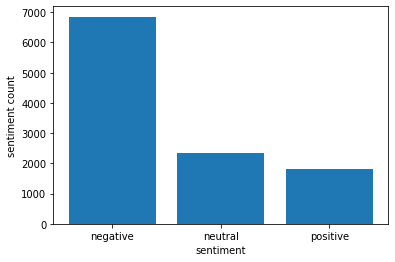

In [10]:
import matplotlib.pyplot as plt
Index = [1, 2, 3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['negative', 'neutral', 'positive'])
plt.xlabel('sentiment')
plt.ylabel('sentiment count')

In [11]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
tweet_train['airline_sentiment'] = la.fit_transform(tweet_train['airline_sentiment'])
tweet_train.head(3)

,airline_sentiment,airline,name,retweet_count,text,tweet_location,user_timezone
0,0,Southwest,ColeyGirouard,0,"@SouthwestAir I am scheduled for the morning, ...",Washington D.C.,Atlantic Time (Canada)
1,2,Southwest,WalterFaddoul,0,@SouthwestAir seeing your workers time in and ...,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,2,United,LocalKyle,0,@united Flew ORD to Miami and back and had gr...,Illinois,Central Time (US & Canada)


In [12]:
tweet_train['airline_sentiment'].value_counts()

0    6851
1    2327
2    1802
Name: airline_sentiment, dtype: int64

# Data Preparation 1: HTML decoding
It looks like HTML encoding has not been converted to text, and ended up in text field as ‘&amp’,’&quot’,etc. Decoding HTML to general text will be my first step of data preparation. I will use BeautifulSoup for this.

In [13]:
text1 = "@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambuctions;the city overreacted &amp; clamped down"

In [14]:
from bs4 import BeautifulSoup
ex = BeautifulSoup(text1, 'lxml')
print (ex.get_text())

@TheLeagueSF Not Fun & Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambuctions;the city overreacted & clamped down


# Data Preparation 2: ‘@’mention
The second part of the preparation is dealing with @mention.
Even though @mention carries a certain information (which another user that the tweet mentioned), this information doesn’t add value to build sentiment analysis model.

In [15]:
import re
re.sub(r'@[A-Za-z0-9]+','',text1)

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambuctions;the city overreacted &amp; clamped down'

# Data Preparation 3: URL links
The third part of the cleaning is dealing with URL links, same with @mention, even though it carries some information, for sentiment analysis purpose, this can be ignored.

In [16]:
text2 = "@switchfoot http://twitpic.com/2ylzw - Aww, that's a bummer. #therapyfail"

In [17]:
re.sub('https?://[A-Za-z0-9./]+','',text2)

"@switchfoot  - Aww, that's a bummer. #therapyfail"

# Data Preparation 4: hashtag / numbers
Sometimes the text used with hashtag can provide useful information about the tweet. It might be a bit risky to get rid of all the text together with the hashtag.
So I decided to leave the text intact and just remove the ‘#’. I will do this in the process of cleaning all the non letter characters including numbers(@,#,',:,/,., ...all will get cleared).

In [18]:
re.sub("[^a-zA-Z]", " ",text2)

' switchfoot http   twitpic com  ylzw   Aww  that s a bummer   therapyfail'

In [13]:
import re
from nltk.corpus import stopwords

In [14]:
# would automatically deal with punctuations
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english")) 
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [15]:
tweet_train['clean_tweet'] = tweet_train['text'].apply(lambda x: tweet_to_words(x))

tweet_test['clean_tweet'] = tweet_test['text'].apply(lambda x: tweet_to_words(x))

In [16]:
tweet_train.head(3)

,airline_sentiment,airline,name,retweet_count,text,tweet_location,user_timezone,clean_tweet
0,0,Southwest,ColeyGirouard,0,"@SouthwestAir I am scheduled for the morning, ...",Washington D.C.,Atlantic Time (Canada),southwestair scheduled morning days fact yes s...
1,2,Southwest,WalterFaddoul,0,@SouthwestAir seeing your workers time in and ...,"Indianapolis, Indiana; USA",Central Time (US & Canada),southwestair seeing workers time time going be...
2,2,United,LocalKyle,0,@united Flew ORD to Miami and back and had gr...,Illinois,Central Time (US & Canada),united flew ord miami back great crew service ...


In [17]:
tweet_train['clean_tweet']

0        southwestair scheduled morning days fact yes s...
1        southwestair seeing workers time time going be...
2        united flew ord miami back great crew service ...
3                         southwestair dultch horse radish
4        united flight ord delayed air force one last f...
                               ...                        
10975                               americanair followback
10976    united thanks help wish phone reps could accom...
10977             usairways worst ever dca customerservice
10978           nrhodes look another apology fly usairways
10979    united far worst airline plane delays round tr...
Name: clean_tweet, Length: 10980, dtype: object

In [18]:
tweet_train_clean = []
for tweet in tweet_train['clean_tweet']:
    tweet_train_clean.append(tweet)
    
tweet_test_clean = []
for tweet in tweet_test['clean_tweet']:
    tweet_test_clean.append(tweet)

In [19]:
tweet_train_clean

['southwestair scheduled morning days fact yes sure evening flight one cancelled flightled',
 'southwestair seeing workers time time going beyond love flying guys thank',
 'united flew ord miami back great crew service legs thanks',
 'southwestair dultch horse radish',
 'united flight ord delayed air force one last flight sbn mins landed',
 'united load us flying sardine knew pilots hours late flight incompetent beyond belief',
 'jetblue stock response delays frustrating poor cust serv amp told ppl wait amp come back',
 'jetblue nice hoping rack enough miles take trip seattle enjoy perfect latte city coffee',
 'united frankly worse customer service ever problems happen deal defines company never united',
 'southwestair yeah haha never one expensive much fun destinationdragons',
 'southwestair mco gt dca flight almost full people screwed msy dca cancelled flightation united usairways cancelled flight swa mistake',
 'jetblue easiest way get ticket receipt get one check get one online tha

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer = "word")
train_features= vec.fit_transform(tweet_train_clean)
test_features= vec.transform(tweet_test_clean)

In [21]:
train_features, test_features

(<10980x11471 sparse matrix of type '<class 'numpy.int64'>'
 	with 107004 stored elements in Compressed Sparse Row format>,
 <3660x11471 sparse matrix of type '<class 'numpy.int64'>'
 	with 33563 stored elements in Compressed Sparse Row format>)

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [23]:
nb.fit(train_features,tweet_train['airline_sentiment'])
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(nb.predict(train_features),tweet_train['airline_sentiment'])
accuracy

0.8437158469945355

In [24]:
from sklearn.svm import SVC
svc = SVC()

In [25]:
svc.fit(train_features,tweet_train['airline_sentiment'])
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(svc.predict(train_features),tweet_train['airline_sentiment'])
accuracy1

0.920127504553734

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200)

In [27]:
clf.fit(train_features,tweet_train['airline_sentiment'])
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(clf.predict(train_features),tweet_train['airline_sentiment'])
accuracy2

0.995719489981785

In [28]:
test_pred = svc.predict(test_features)
print(test_pred)
test_pred = la.inverse_transform(test_pred)
print(test_pred)
np.savetxt("twitter_pred.csv",test_pred,fmt='%s')

[0 0 0 ... 1 2 0]
['negative' 'negative' 'negative' ... 'neutral' 'positive' 'negative']


# Testing the model with one sample test data

In [29]:
data = {'airline_sentiment':[0], 'airline':['Southwest'],'name':['Harsh'],'text':['Crew fired up @SouthwestAir, reached out to the early adopter, gently asked the user for evidence, and the wrong-facts-have retreated. A triumph'],'tweet_location':['Washington'], 'user_timezone':['Central Time (US & Canada)']}

In [30]:
tweet = pd.DataFrame(data)

In [31]:
tweet

,airline_sentiment,airline,name,text,tweet_location,user_timezone
0,0,Southwest,Harsh,"Crew fired up @SouthwestAir, reached out to th...",Washington,Central Time (US & Canada)


In [32]:
tweet['clean_tweet'] = tweet['text'].apply(lambda x: tweet_to_words(x))

In [33]:
tweet_clean = []
for tweet in tweet['clean_tweet']:
    tweet_clean.append(tweet) 

In [34]:
tweet_clean

['crew fired southwestair reached early adopter gently asked user evidence wrong facts retreated triumph']

In [35]:
#vec = CountVectorizer(analyzer = "word")
tweet_features = vec.transform(tweet_clean)
tweet_features

<1x11471 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [36]:
predddd = svc.predict(tweet_features)
print(predddd)

[0]
